# 1. Crime_data

# Hierarchy Cluster

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    50
dtype: int64

*Feature Scaling*

In [10]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [11]:
x = pd.DataFrame(x, columns=df.columns)
x.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [12]:
plt.rcParams['figure.figsize']= (15,8)
plt.rcParams['figure.dpi'] = 200
plt.show()

*Creating linkage & Dendrogram*

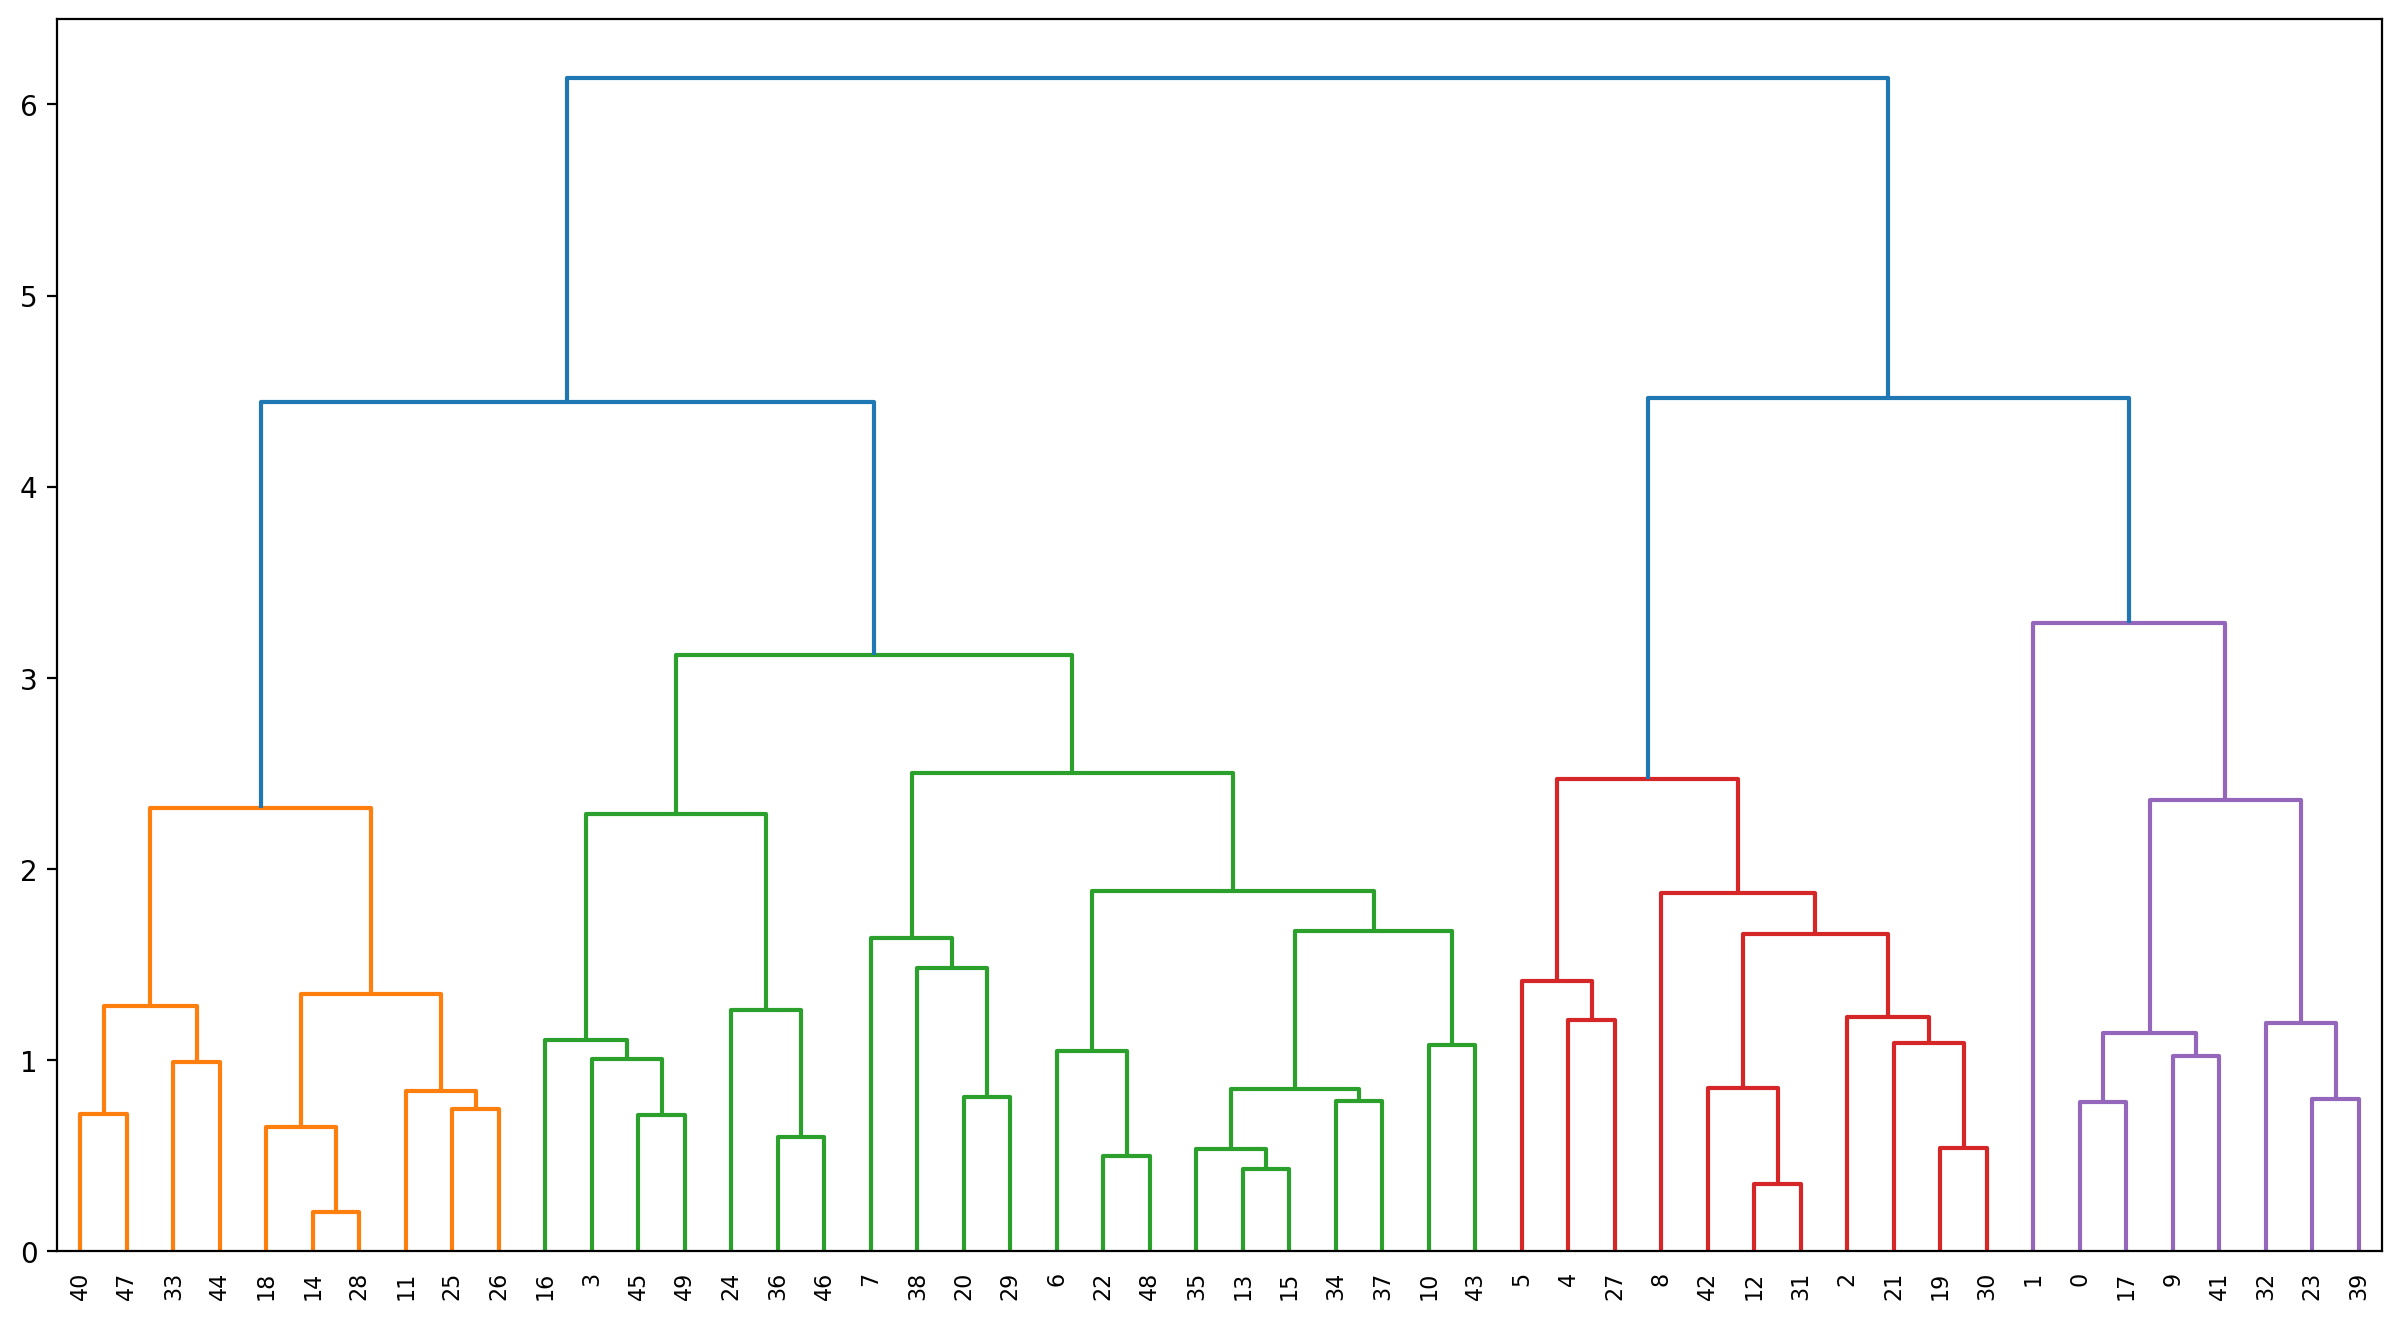

In [13]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

*Model Building*

In [15]:
hc = AgglomerativeClustering()
ylabel = hc.fit_predict(x)
ylabel

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
df["Cluster"]= ylabel
df.head(2)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1


In [17]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


KMeans Cluster

In [19]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Feature Scaling

In [22]:
x= sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

x = pd.DataFrame(x,columns=df.columns)
x.head()

*Model Building*

In [24]:
km = KMeans()
cluster = km.fit_predict(x)
cluster

array([6, 5, 1, 3, 7, 7, 0, 3, 1, 6, 0, 2, 1, 3, 2, 3, 3, 6, 2, 1, 0, 1,
       0, 4, 3, 3, 3, 7, 2, 0, 1, 1, 4, 2, 3, 3, 3, 0, 0, 4, 2, 6, 1, 0,
       2, 3, 3, 2, 0, 3])

*Elbow graph*

In [26]:
wcss = []

for i in range(1, 21):
    km = KMeans(n_clusters=i)
    cluster = km.fit_predict(x)
    wcss.append(km.inertia_)

wcss

[200.0,
 104.96163315756871,
 80.0657554011071,
 57.55425863091104,
 50.16335813593606,
 45.57280466571964,
 40.864284145063806,
 35.478269602739516,
 32.089879955694755,
 28.57877849739398,
 24.71933405149187,
 23.475936801451674,
 20.646191903519316,
 19.687457376290066,
 18.353751808869177,
 17.85940859685953,
 15.701569144047413,
 14.092340599278025,
 13.772515041967095,
 12.835973596638437]

Text(0, 0.5, 'WCSS')

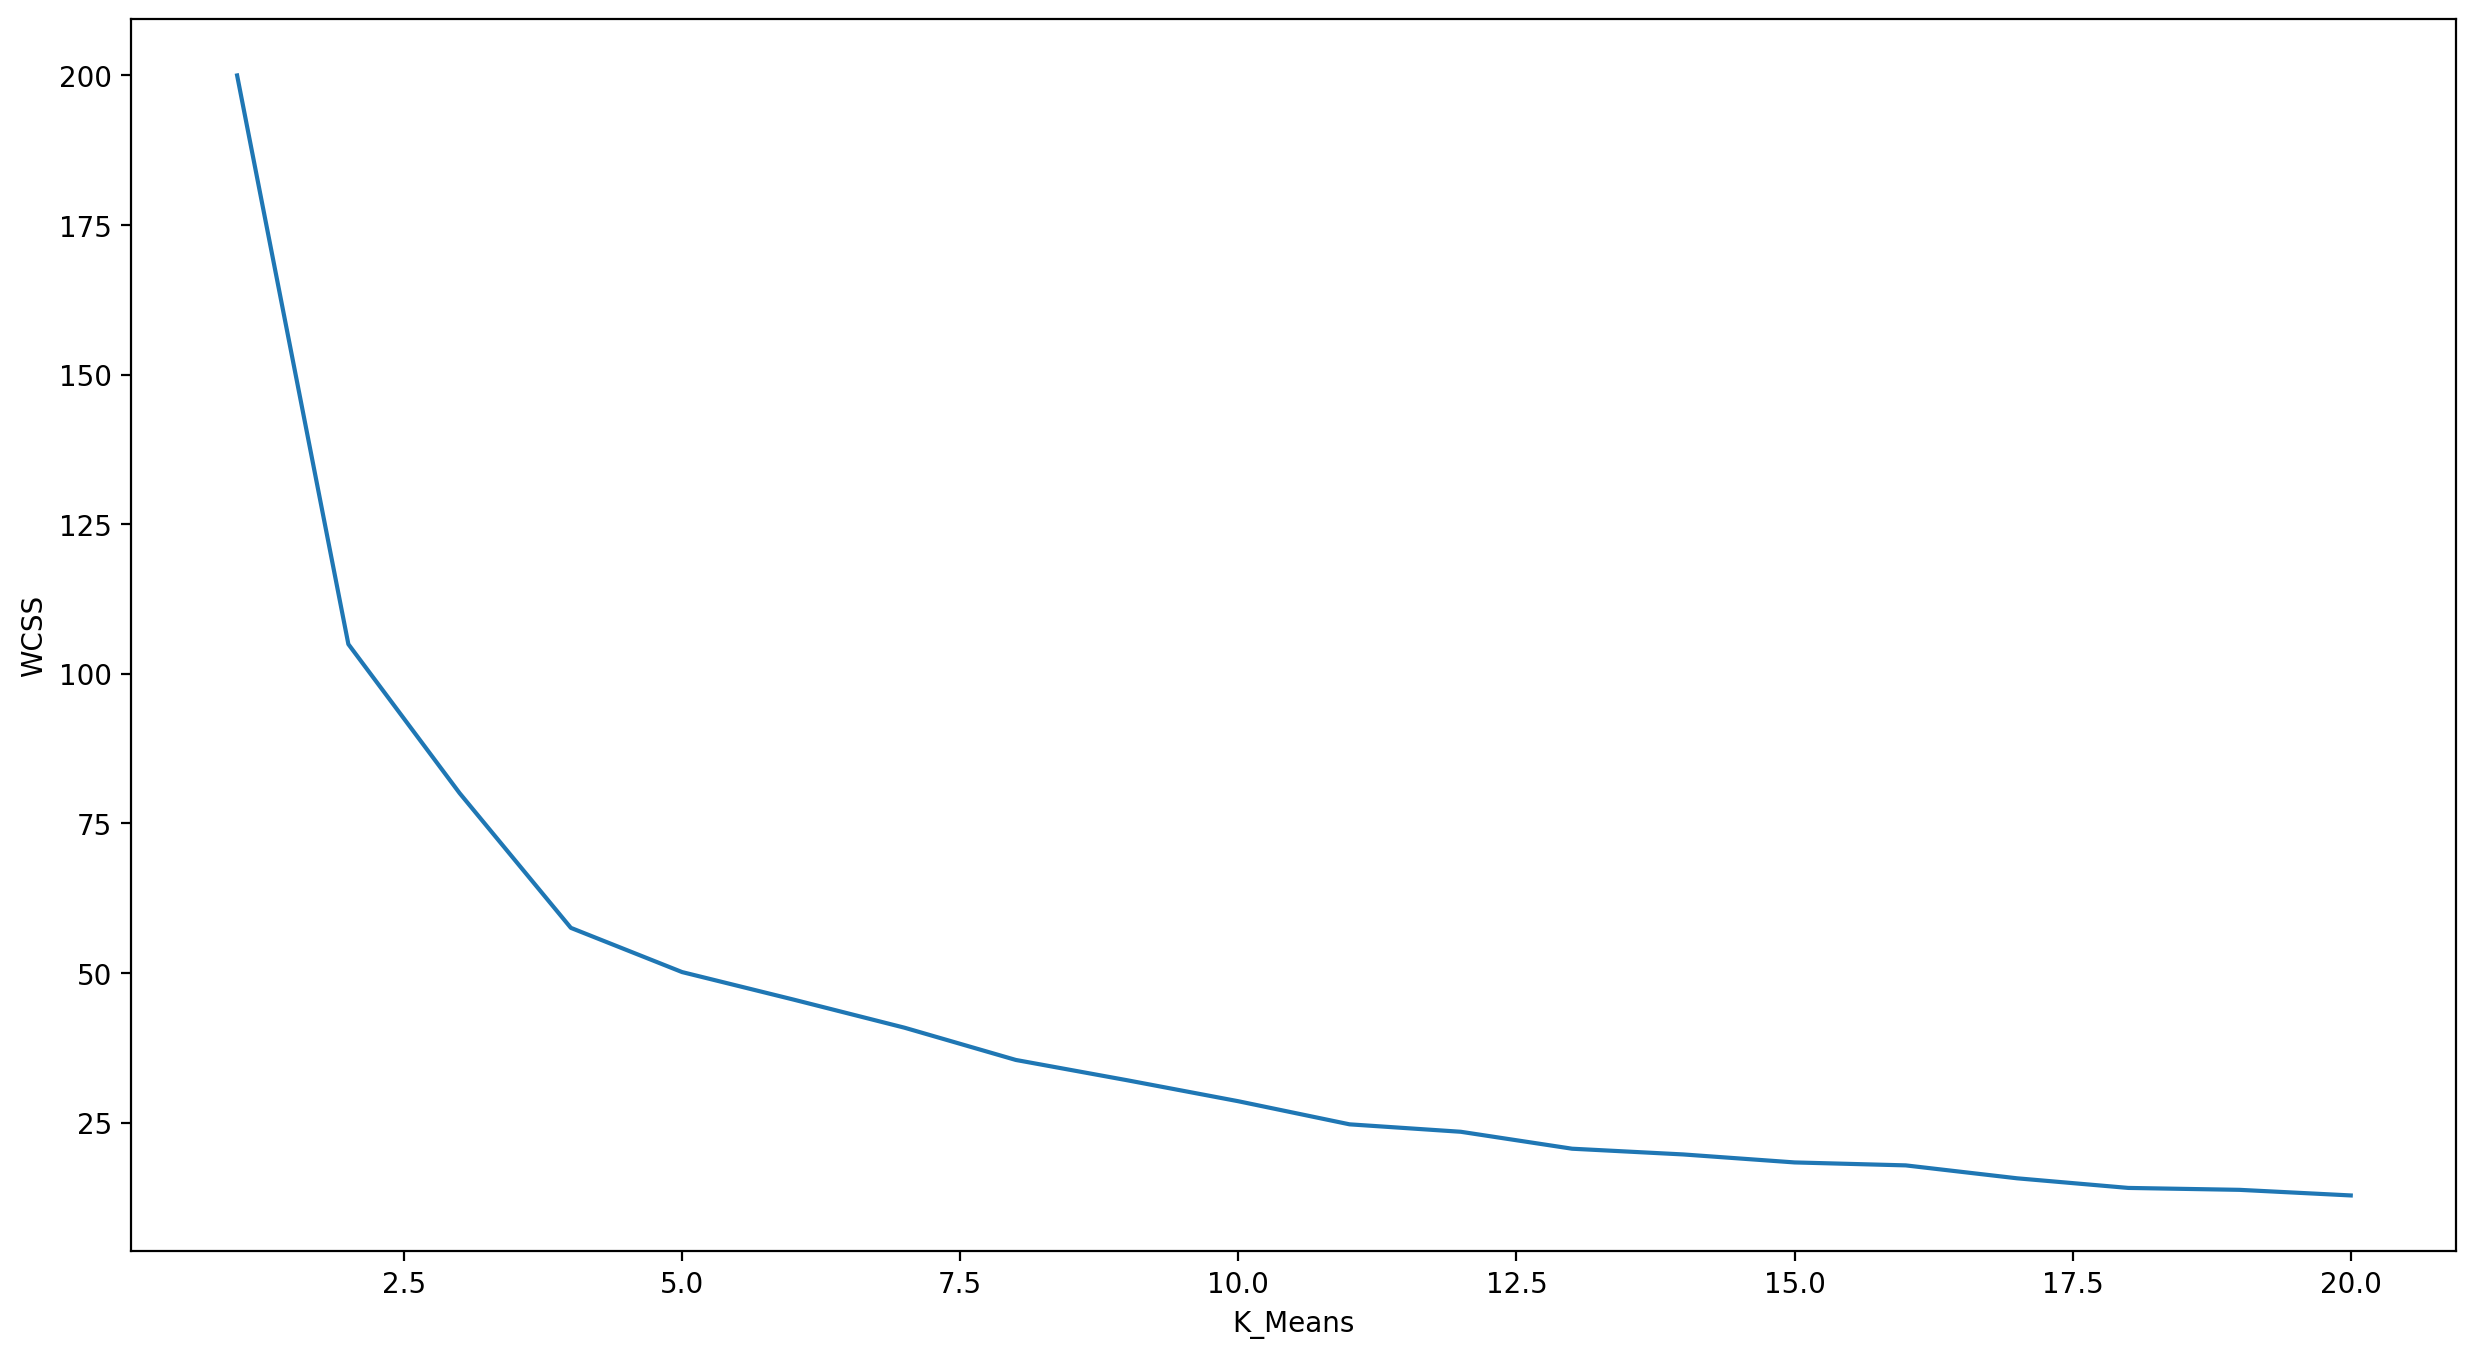

In [27]:
plt.plot(range(1,21),wcss)
plt.xlabel('K_Means')
plt.ylabel('WCSS')

In [28]:
km = KMeans(n_clusters=4)
ylabel = km.fit_predict(x)
ylabel

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [29]:
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [30]:
df['Cluster'] = ylabel
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1


In [31]:
df.groupby(df['Cluster']).agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [32]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         2

    accuracy                           0.80        10
   macro avg       0.64      0.62      0.60        10
weighted avg       0.74      0.80      0.75        10



DBSCAN

In [34]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


*Feature Scaling*

In [36]:
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [37]:
x = pd.DataFrame(x, columns=df.columns)
x.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


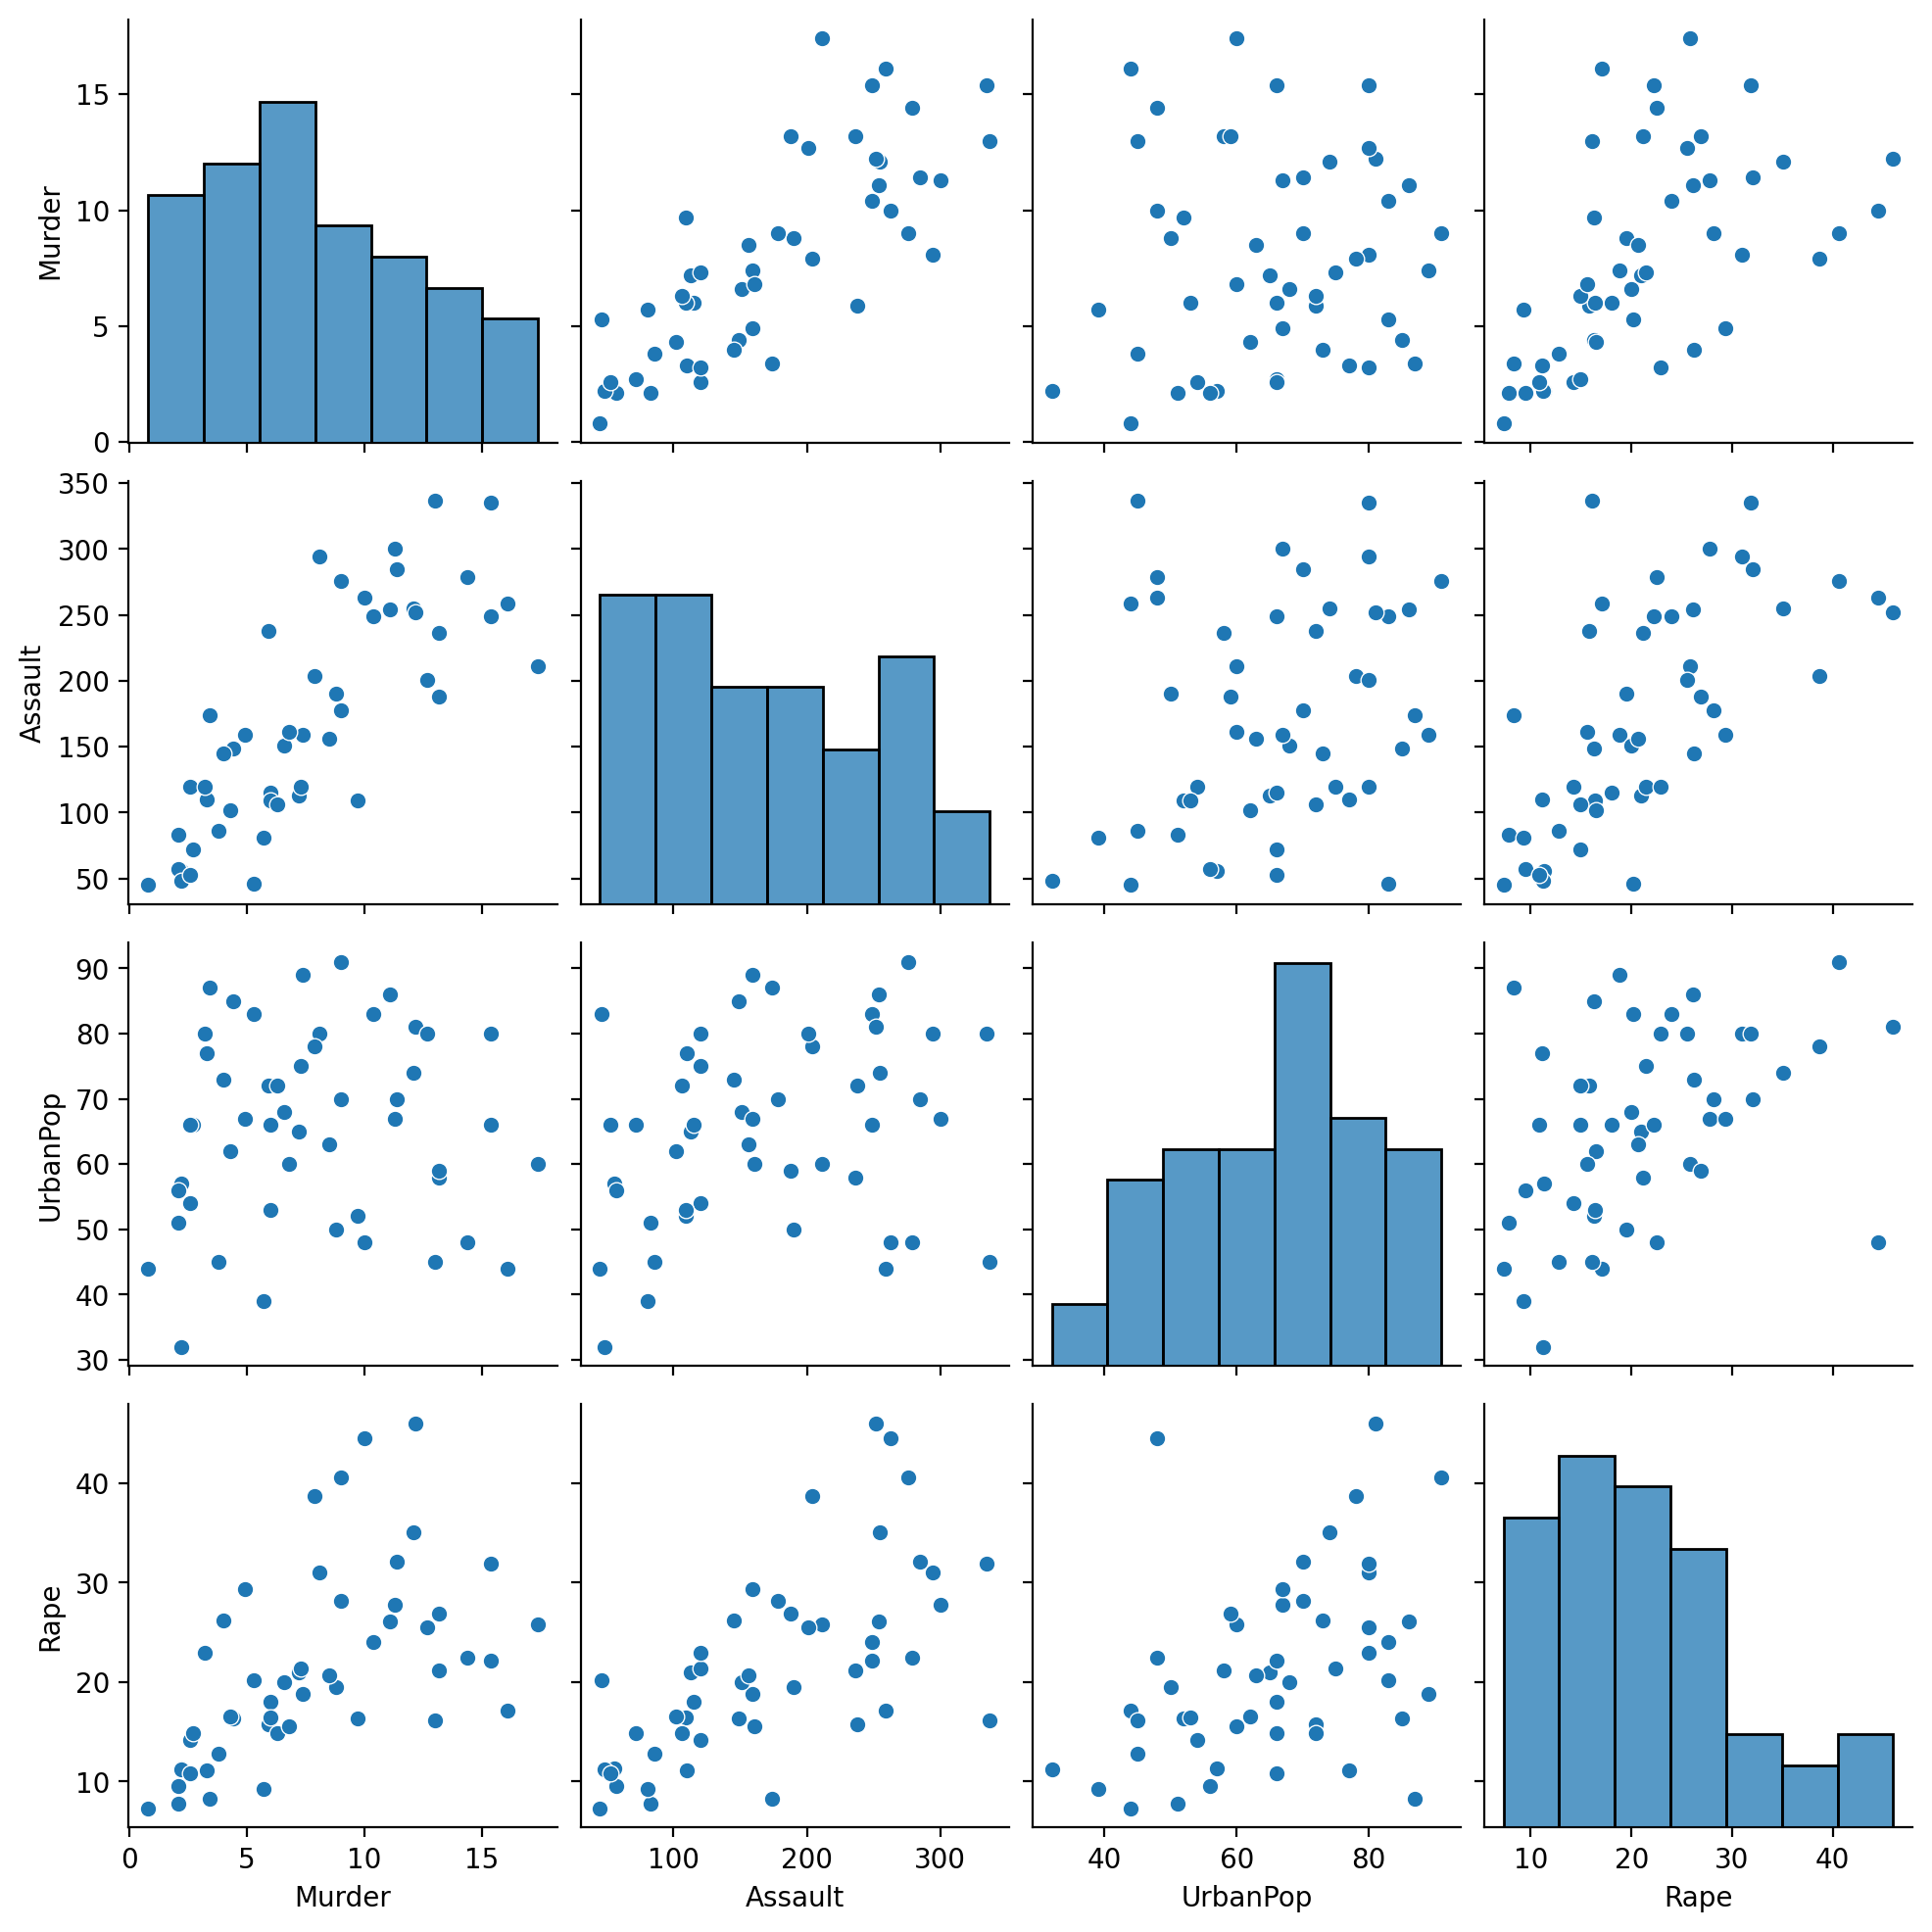

In [38]:
sns.pairplot(df)

*Model Building*

In [39]:
db = DBSCAN()
ylabel = db.fit_predict(x)
ylabel

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [40]:
db = DBSCAN(eps=2 ,min_samples=3)

ylabel = db.fit_predict(x)
ylabel

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [41]:
silhouette_score(x, ylabel)

0.23455598753159795

In [42]:
df['Cluster'] = y
df.head(2)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,1


In [43]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [44]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=3)
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.90      0.83      0.81        10
weighted avg       0.88      0.80      0.78        10



# 2. East_West_Airlines

# Hierarchy Cluster

In [45]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [49]:
df[df.duplicated(keep=False)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [50]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

*Feature Scaling*

In [51]:
mn = MinMaxScaler()
x = mn.fit_transform(df)
x

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [52]:
x = pd.DataFrame(x, columns= df.columns)
x.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


*Creating Linkage & Dendrogram*

In [61]:
lk = hierarchy.linkage(x, method='complete')

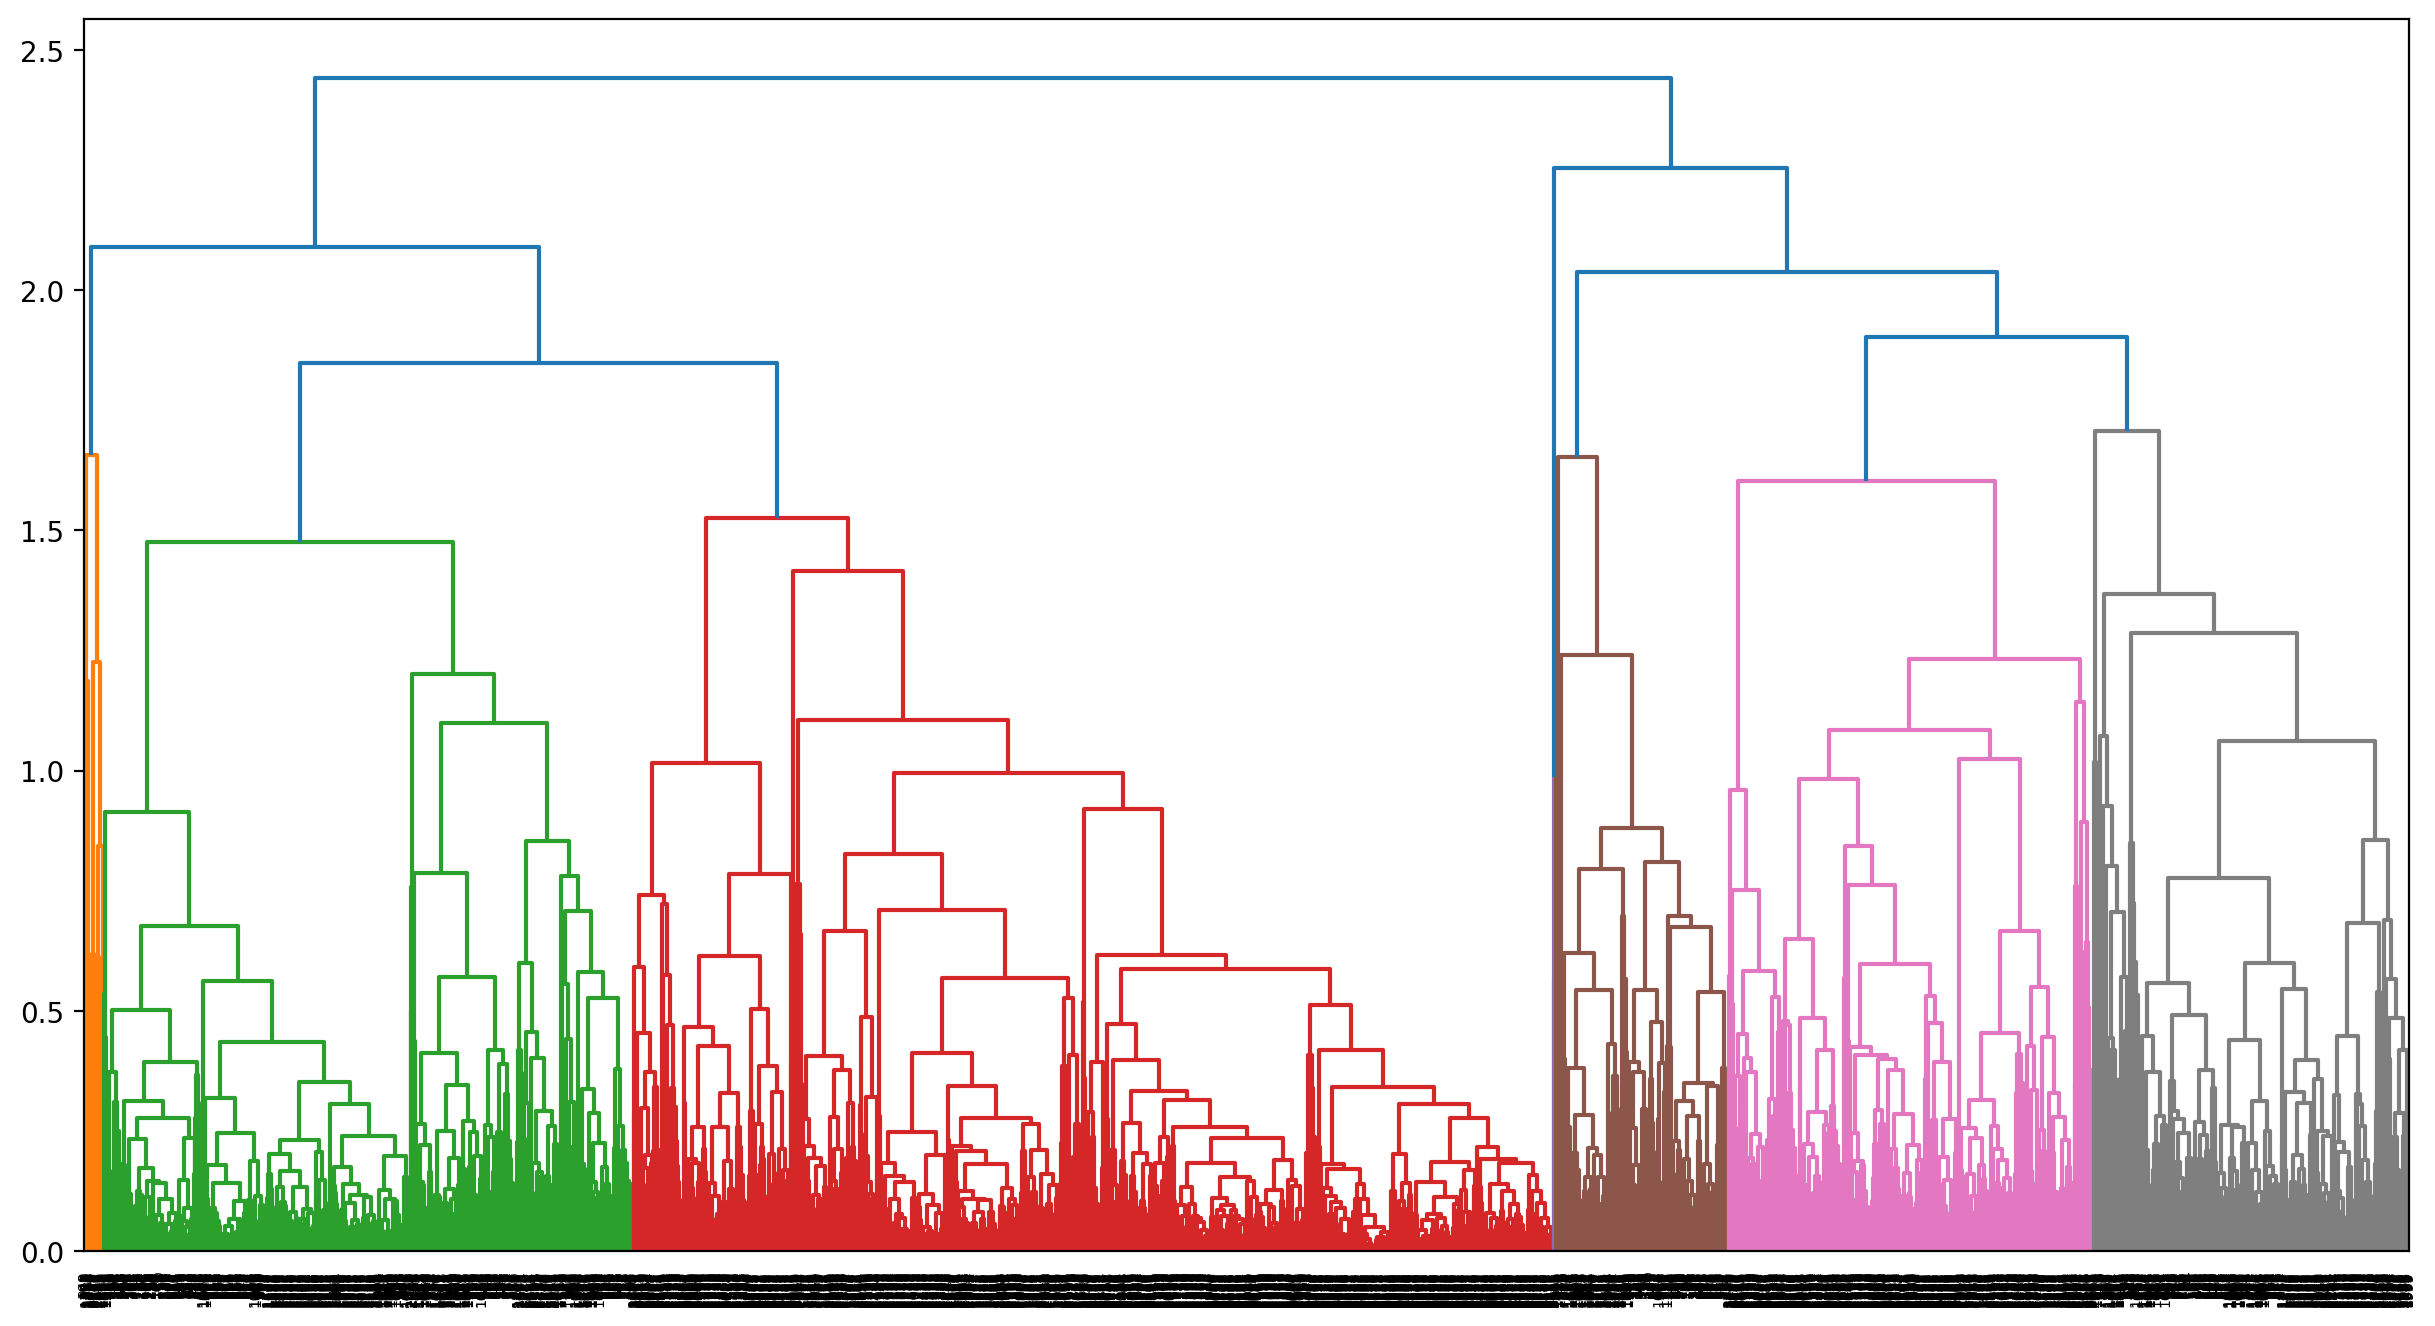

In [60]:
dendrogram = hierarchy.dendrogram(lk)

In [58]:
hc = AgglomerativeClustering()
ylabel = hc.fit_predict(x)
df['Cluster'] = ylabel
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [56]:
df.groupby('Cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


# Kmeans

In [ ]:
# importing the dataset
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df.describe()

In [63]:
df.drop('ID#',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
 11  Cluster            3998 non-null   int64
dtypes: int64(12)
memory usage: 406.0 KB


Feature Scaling

In [65]:
x = mn.fit_transform(df)
x

array([[0.01650773, 0.        , 0.        , ..., 0.84374246, 0.        ,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.83988425, 0.        ,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.84784181, 0.        ,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.16879672, 1.        ,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.16867615, 0.        ,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.16831444, 0.        ,
        0.        ]])

In [66]:
km = KMeans()
ylabel = km.fit_predict(x)
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    ylabel = km.fit_predict(x)
    wcss.append(km.inertia_)
    
wcss

[2762.853466087521,
 823.5583625482057,
 625.1023289936247,
 436.64269845587904,
 348.9348563312635,
 315.30621979574755,
 287.93354201753795,
 263.04439731670976,
 245.2371382191612,
 232.0984482593793,
 215.30023273069443,
 206.45696295462173,
 199.0561070475926,
 191.4836188784743,
 180.92060404472812,
 178.07413228241387,
 166.21848331489537,
 165.33428868081077,
 157.90136949859883,
 153.76617031516002]

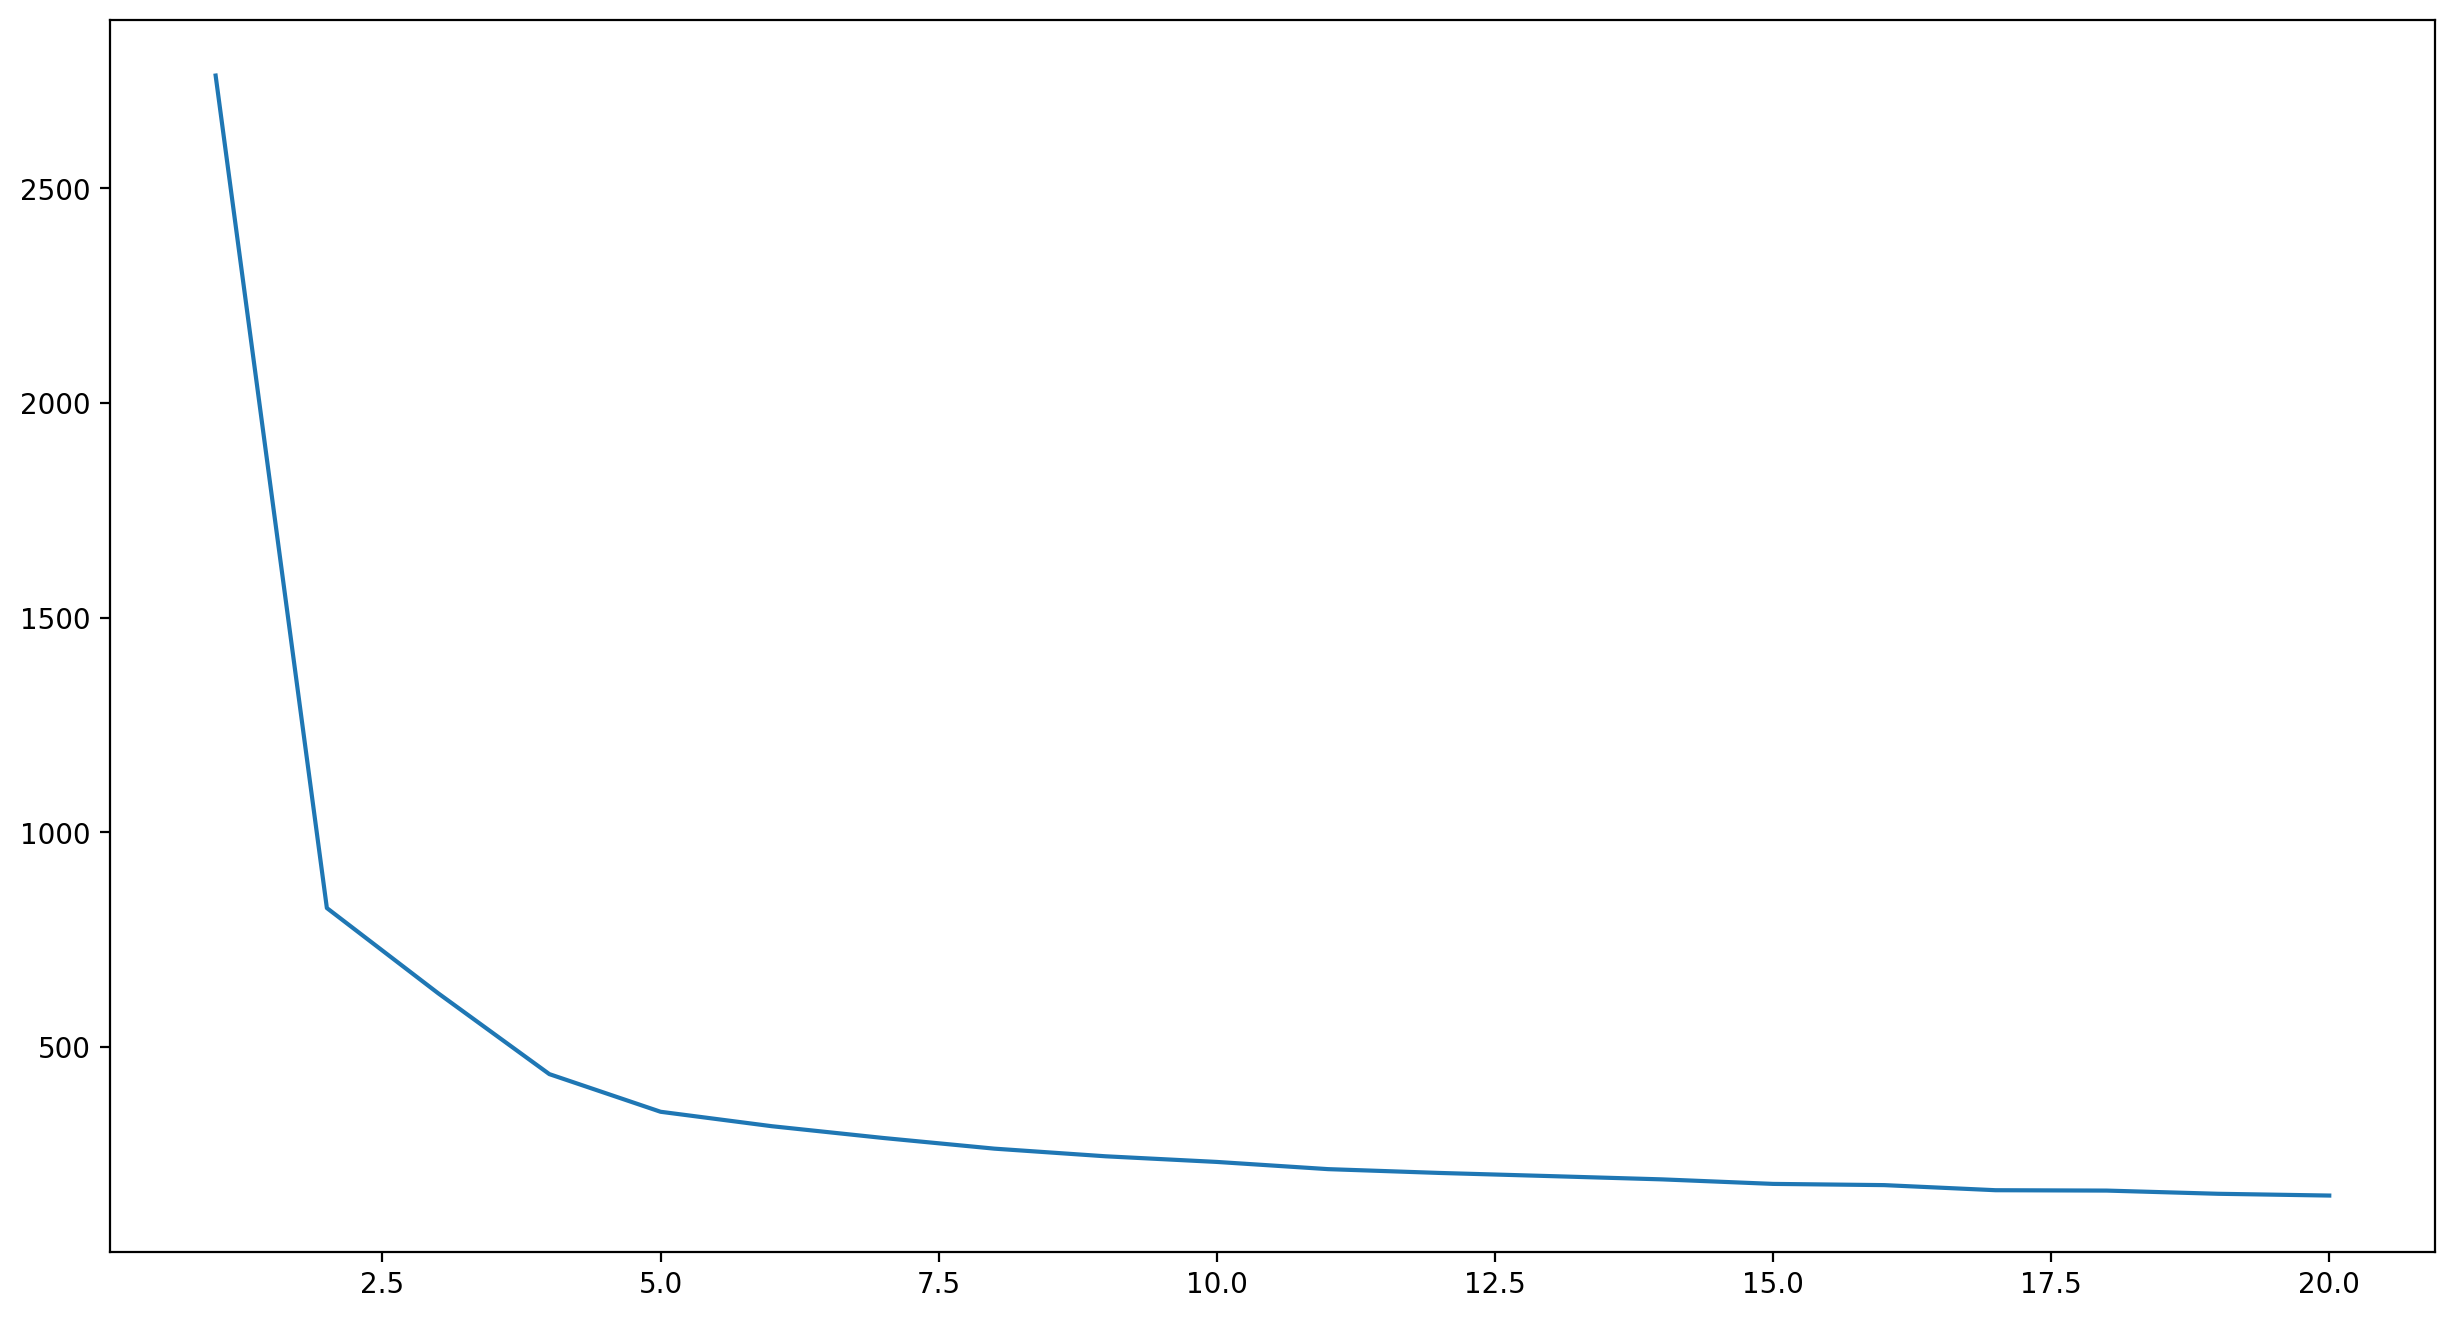

In [67]:
plt.plot(range(1,21),wcss)

In [68]:
km = KMeans(n_clusters=5)
ylabel = km.fit_predict(x)
km.cluster_centers_

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  8.88178420e-16,  8.88178420e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00,  1.00000000e+00],
       [ 1.94320126e-02,  8.45201690e-03,  1.77012609e-02,
         8.24442289e-03,  1.69738118e-03,  1.23164659e-02,
         7.18539237e-02,  6.91362644e-03,  1.14012774e-02,
         2.40027206e-01, -1.60982339e-15, -1.60982339e-15],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01,  1.49880108e-15,  1.49880108e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.2896039

In [69]:
df['Cluster'] = ylabel
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4


In [70]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=3)
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.44      0.84      0.58       170
           1       0.30      0.40      0.34       123
           2       0.00      0.00      0.00       205
           3       0.42      0.17      0.24       130
           4       0.52      0.77      0.62       172

    accuracy                           0.43       800
   macro avg       0.34      0.44      0.36       800
weighted avg       0.32      0.43      0.35       800



# DBSCAN

In [72]:
# importing the dataset
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [73]:
df.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [74]:
df.drop('ID#', axis=1, inplace=True)
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


*Feature Scaling*

In [75]:
mn = MinMaxScaler()
x = mn.fit_transform(df)
x

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [76]:
x = pd.DataFrame(x, columns=df.columns)
x.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0


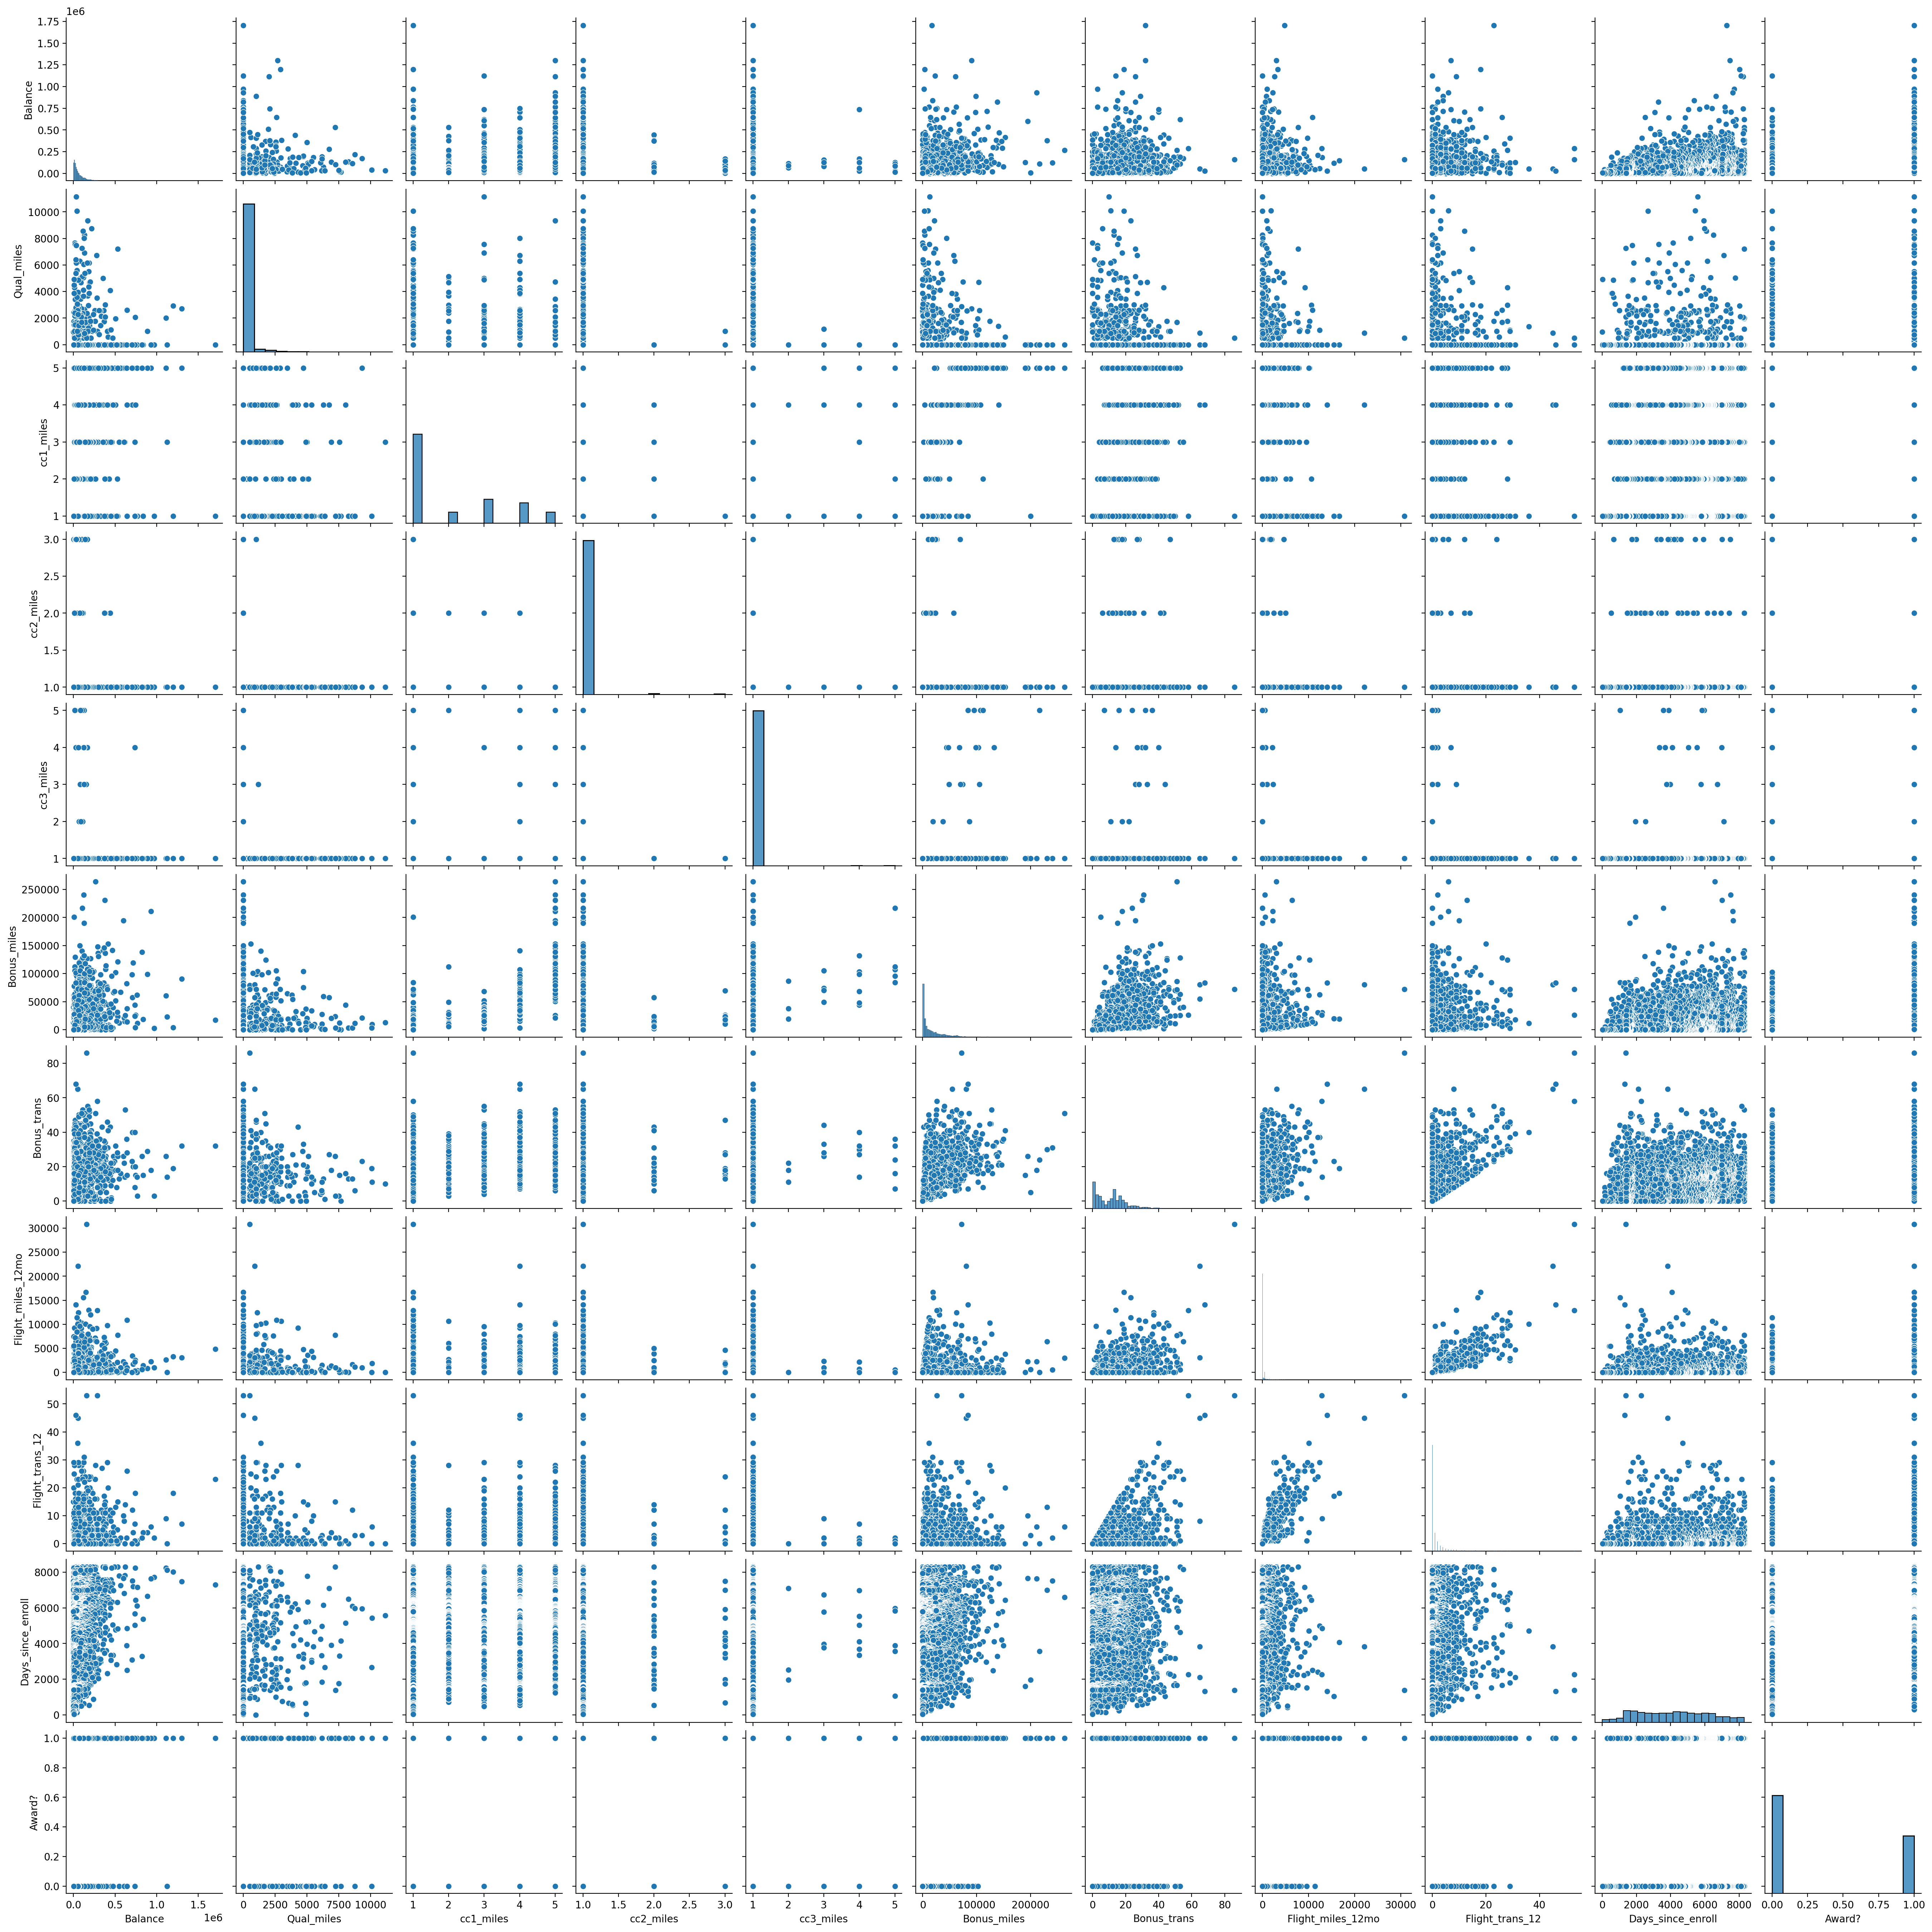

In [77]:
sns.pairplot(df)

*Model Building*

In [78]:
db = DBSCAN()
ylabel = db.fit_predict(x)
silhouette_score(x, ylabel)

0.24338879565909566

In [79]:
db = DBSCAN(eps=1 ,min_samples=5)
ylabel = db.fit_predict(x)
ylabel

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
silhouette_score(x, ylabel)

0.535930510919477

In [81]:
df['Cluster'] = ylabel
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0


In [82]:
df['Cluster'].value_counts()

0    2518
1    1481
Name: Cluster, dtype: int64

In [83]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=3)
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       482
           1       0.68      0.50      0.58       318

    accuracy                           0.71       800
   macro avg       0.70      0.67      0.68       800
weighted avg       0.70      0.71      0.70       800

